# List of queries

# Importing dependicies

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

# Getting the dataset

In [4]:
df=pd.read_csv('F:/Restaurant sales analysis/restaurant_sales.csv')
df = df.reset_index(drop=True)
df.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,7/3/2023,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2023,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2023,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,2/3/2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10/2/2023,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening


In [5]:
df.shape

(1000, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            1000 non-null   int64 
 1   date                1000 non-null   object
 2   item_name           1000 non-null   object
 3   item_type           1000 non-null   object
 4   item_price          1000 non-null   int64 
 5   quantity            1000 non-null   int64 
 6   transaction_amount  1000 non-null   int64 
 7   transaction_type    893 non-null    object
 8   received_by         1000 non-null   object
 9   time_of_sale        1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [7]:
df.isnull().sum()

order_id                0
date                    0
item_name               0
item_type               0
item_price              0
quantity                0
transaction_amount      0
transaction_type      107
received_by             0
time_of_sale            0
dtype: int64

In [8]:
df.describe()

,order_id,item_price,quantity,transaction_amount
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,33.315000,8.162000,275.230000
std,288.819436,14.921744,4.413075,204.402979
min,1.000000,20.000000,1.000000,20.000000
25%,250.750000,20.000000,4.000000,120.000000
50%,500.500000,25.000000,8.000000,240.000000
75%,750.250000,50.000000,12.000000,360.000000
max,1000.000000,60.000000,15.000000,900.000000


# Data cleaning

In [9]:


# Assuming 'train' is your DataFrame and 'Item_Weight' is a column with missing values
missing_columns = ['transaction_type']

# Create the SimpleImputer with the desired strategy (e.g., 'mean', 'median', or 'most_frequent')
imputer = SimpleImputer(strategy='most_frequent')

# Apply the imputer to the selected columns with missing values
df[missing_columns] = imputer.fit_transform(df[missing_columns])


In [10]:
df.isnull().sum()/df.shape[0]*100

order_id              0.0
date                  0.0
item_name             0.0
item_type             0.0
item_price            0.0
quantity              0.0
transaction_amount    0.0
transaction_type      0.0
received_by           0.0
time_of_sale          0.0
dtype: float64

#### getting information about column values

In [11]:
df['time_of_sale'].unique()

array(['Night', 'Afternoon', 'Evening', 'Morning', 'Midnight'],
      dtype=object)

In [12]:
df['received_by'].unique()

array(['Mr.', 'Mrs.'], dtype=object)

In [13]:
df['transaction_type'].unique()

array(['Cash', 'Online'], dtype=object)

In [14]:
df['item_type'].unique()

array(['Fastfood', 'Beverages'], dtype=object)

In [15]:
df['item_name'].unique()

array(['Aalopuri', 'Vadapav', 'Sugarcane juice', 'Panipuri', 'Frankie',
       'Sandwich', 'Cold coffee'], dtype=object)

#### Change data type of datetime column

In [16]:
df['date']= pd.to_datetime(df["date"])

#### Extracting day names, month names and year from data column

In [17]:
df['DayName'] = df['date'].dt.strftime('%A')
df['MonthName'] = df['date'].dt.strftime('%B')
df['Year'] = df['date'].dt.year

#### Droping order_id and date column

In [18]:
df.drop(['order_id','date'],axis=1,inplace=True)

#### Creating feature total_price

In [19]:
df['total_price']=df['item_price']*df['quantity']


In [20]:
df.head()

,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale,DayName,MonthName,Year,total_price
0,Aalopuri,Fastfood,20,13,260,Cash,Mr.,Night,Monday,July,2023,260
1,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon,Wednesday,August,2023,300
2,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon,Monday,November,2023,20
3,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night,Friday,February,2023,150
4,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening,Monday,October,2023,200


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_name           1000 non-null   object
 1   item_type           1000 non-null   object
 2   item_price          1000 non-null   int64 
 3   quantity            1000 non-null   int64 
 4   transaction_amount  1000 non-null   int64 
 5   transaction_type    1000 non-null   object
 6   received_by         1000 non-null   object
 7   time_of_sale        1000 non-null   object
 8   DayName             1000 non-null   object
 9   MonthName           1000 non-null   object
 10  Year                1000 non-null   int64 
 11  total_price         1000 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 93.9+ KB


# EDA

#### Query 1: What is the total sold quantity of a specific product during a particular time period?

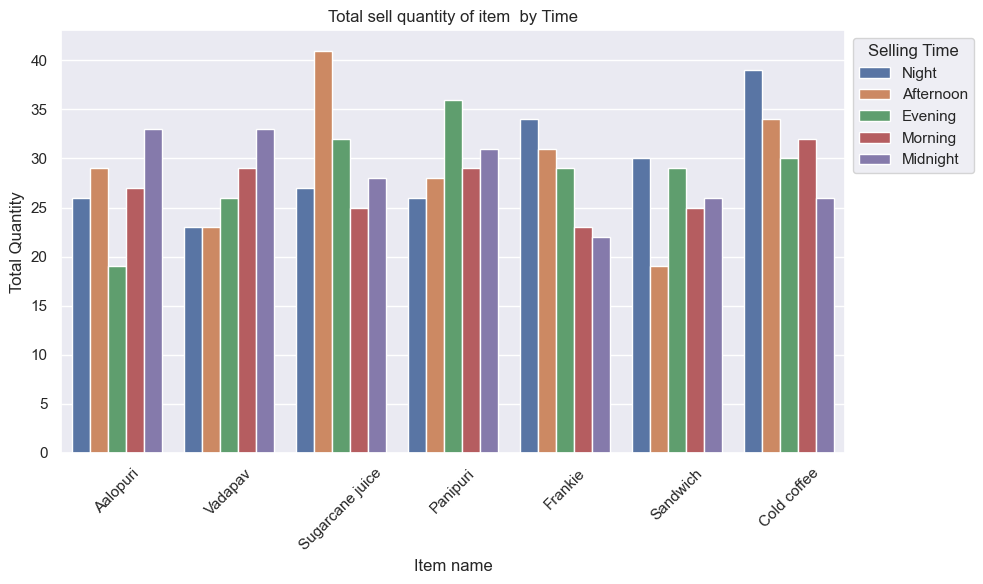

In [49]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='item_name', hue='time_of_sale')
plt.xlabel("Item name")
plt.ylabel("Total Quantity")
plt.title("Total sell quantity of item  by Time")
plt.legend(title='Selling Time', bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Query 2: What was the total sales amount of items during a particular time period?

In [22]:
sales_by_item_time = df.groupby(['item_name', 'time_of_sale'])['total_price'].sum().reset_index()
sales_by_item_time

,item_name,time_of_sale,total_price
0,Aalopuri,Afternoon,4520
1,Aalopuri,Evening,2720
2,Aalopuri,Midnight,4460
3,Aalopuri,Morning,4300
4,Aalopuri,Night,4880
5,Cold coffee,Afternoon,13480
6,Cold coffee,Evening,9400
7,Cold coffee,Midnight,8120
8,Cold coffee,Morning,11480
9,Cold coffee,Night,11960


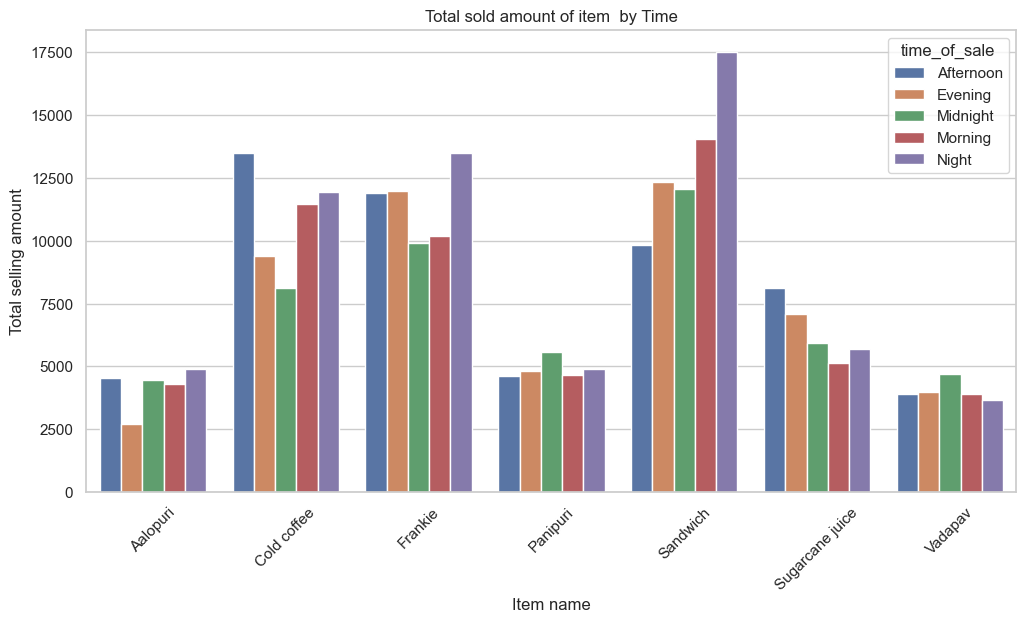

In [23]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_by_item_time, x='item_name', y='total_price', hue='time_of_sale')
plt.xticks(rotation=45)  
plt.xlabel("Item name")
plt.ylabel("Total selling amount")
plt.title("Total sold amount of item  by Time")
plt.show()


#### Query 3: What was the quantity of a specific product sold on a particular day?

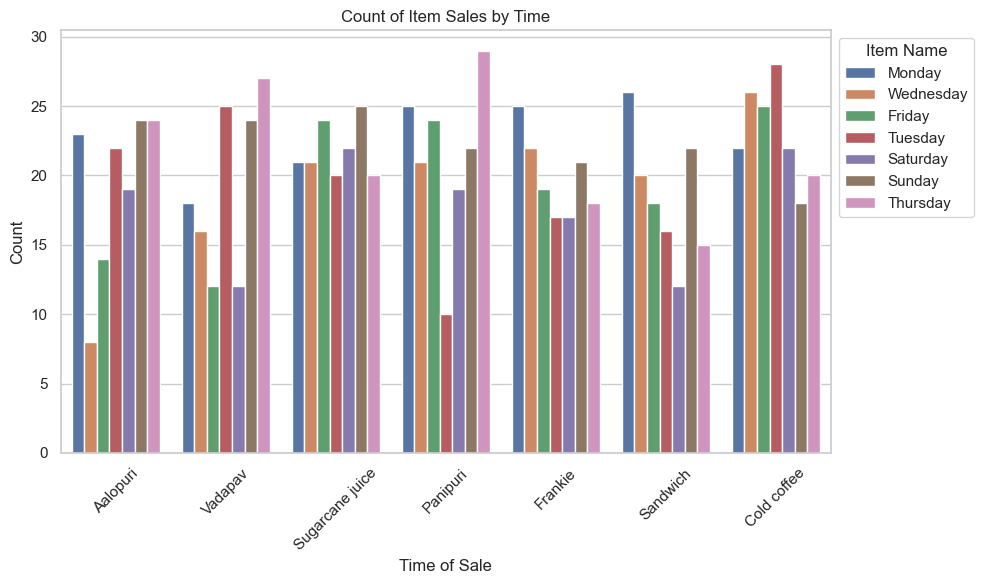

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='item_name', hue='DayName')
plt.xlabel("Time of Sale")
plt.ylabel("Count")
plt.title("Count of Item Sales by Time")
plt.legend(title='Item Name', bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Query 4: How much sales revenue was generated from each item for each day?¶

In [25]:
total_sales_by_day =df.groupby(['DayName', 'item_name'])['total_price'].sum().reset_index()
total_sales_by_day

,DayName,item_name,total_price
0,Friday,Aalopuri,1740
1,Friday,Cold coffee,7360
2,Friday,Frankie,8300
3,Friday,Panipuri,3980
4,Friday,Sandwich,9240
5,Friday,Sugarcane juice,5050
6,Friday,Vadapav,1360
7,Monday,Aalopuri,4080
8,Monday,Cold coffee,8400
9,Monday,Frankie,9700


In [26]:
pivot_sales = total_sales_by_day.pivot(index='item_name', columns='DayName', values='total_price')
pivot_sales

DayName,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
item_name,,,,,,,
Aalopuri,1740,4080,2640,3640,3960,3200,1620
Cold coffee,7360,8400,8000,6200,6480,9160,8840
Frankie,8300,9700,5700,8500,7750,8100,9450
Panipuri,3980,4360,3300,3480,4380,1680,3340
Sandwich,9240,13380,6120,10500,8460,8280,9840
Sugarcane juice,5050,4250,4600,4525,5100,3450,4975
Vadapav,1360,2860,1920,3260,4800,3320,2600


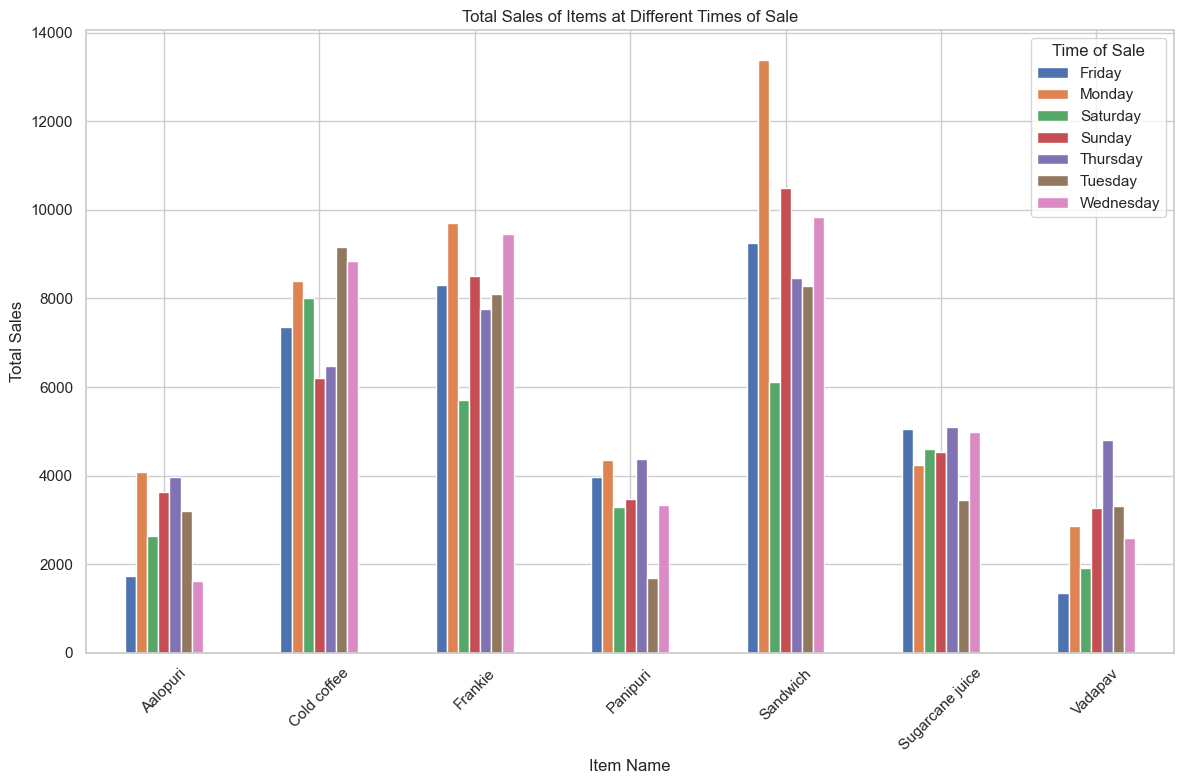

In [27]:
sns.set(style="whitegrid")
pivot_sales.plot(kind='bar', figsize=(12, 8))
plt.xlabel('Item Name')
plt.ylabel('Total Sales')
plt.title('Total Sales of Items at Different Times of Sale')
plt.legend(title='Time of Sale')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Query 5: Calculate the total quantity of items sold within a specific time frame?

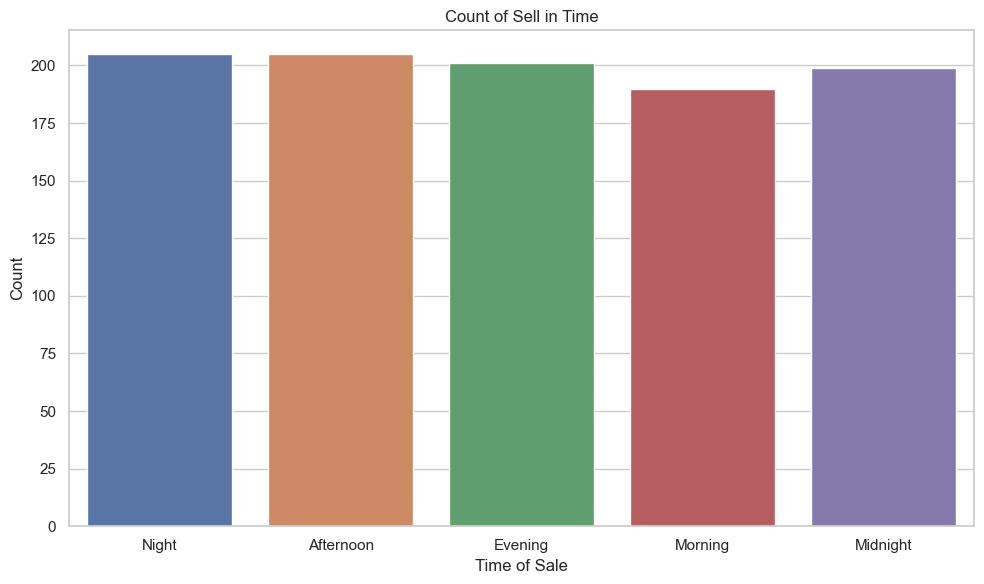

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='time_of_sale')
plt.xlabel("Time of Sale")
plt.ylabel("Count")
plt.title("Count of Sell in Time")
plt.tight_layout()
plt.show()


#### Query 6: Calculate the total quantity of items sold each day?

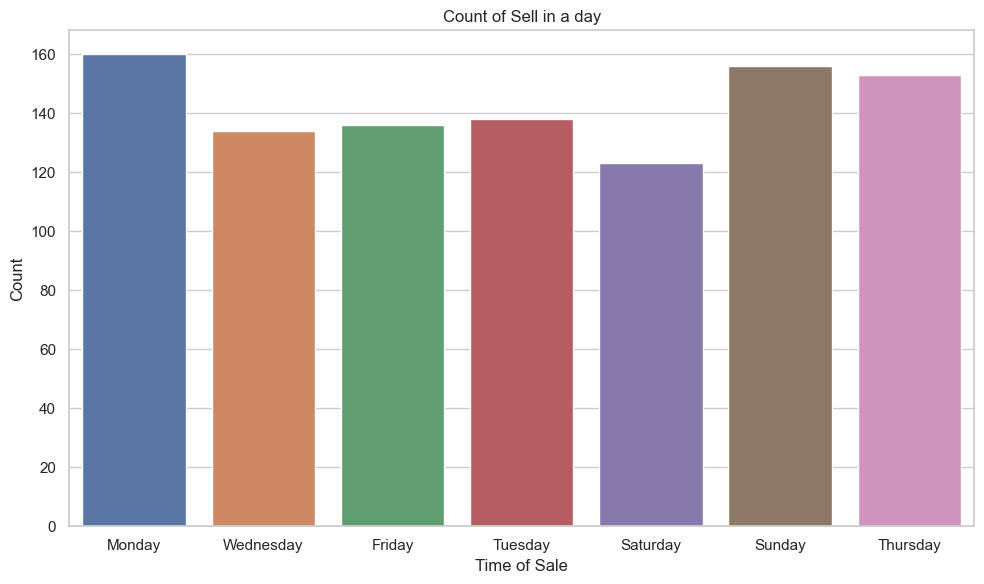

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='DayName')
plt.xlabel("Time of Sale")
plt.ylabel("Count")
plt.title("Count of Sell in a day")
plt.tight_layout()
plt.show()


#### Query 7: What is  the total sold amount of each product?

In [30]:
total_sales_by_item =df.groupby(['item_name'])['total_price'].sum().reset_index()
total_sales_by_item

,item_name,total_price
0,Aalopuri,20880
1,Cold coffee,54440
2,Frankie,57500
3,Panipuri,24520
4,Sandwich,65820
5,Sugarcane juice,31950
6,Vadapav,20120


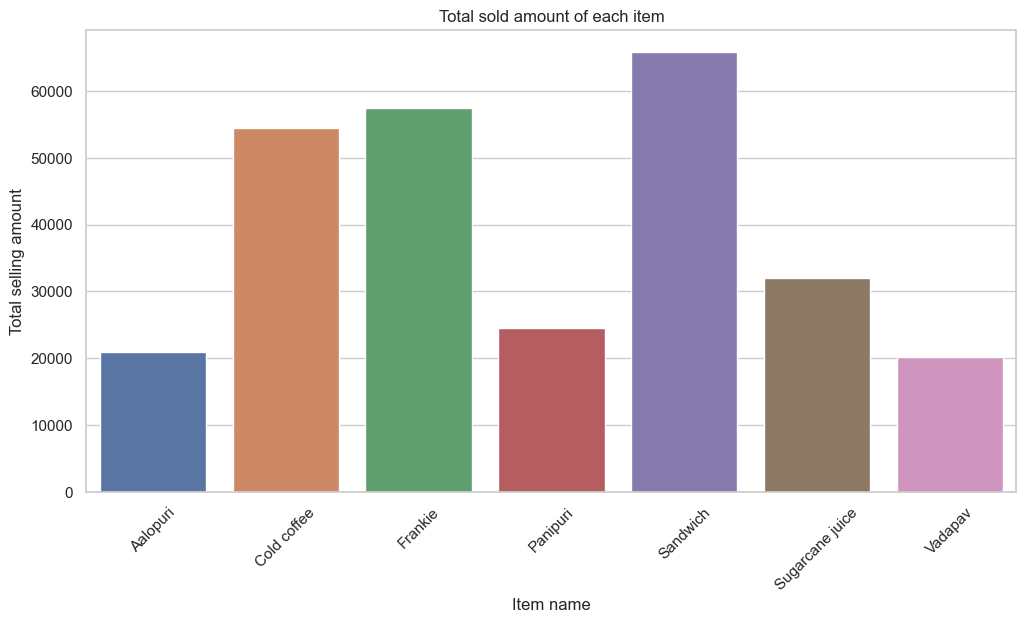

In [31]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(data=total_sales_by_item, x='item_name', y='total_price')
plt.xticks(rotation=45)  
plt.xlabel("Item name")
plt.ylabel("Total selling amount")
plt.title("Total sold amount of each item")
plt.show()


#### Query 8: How frequently has each item type been purchased or sold?

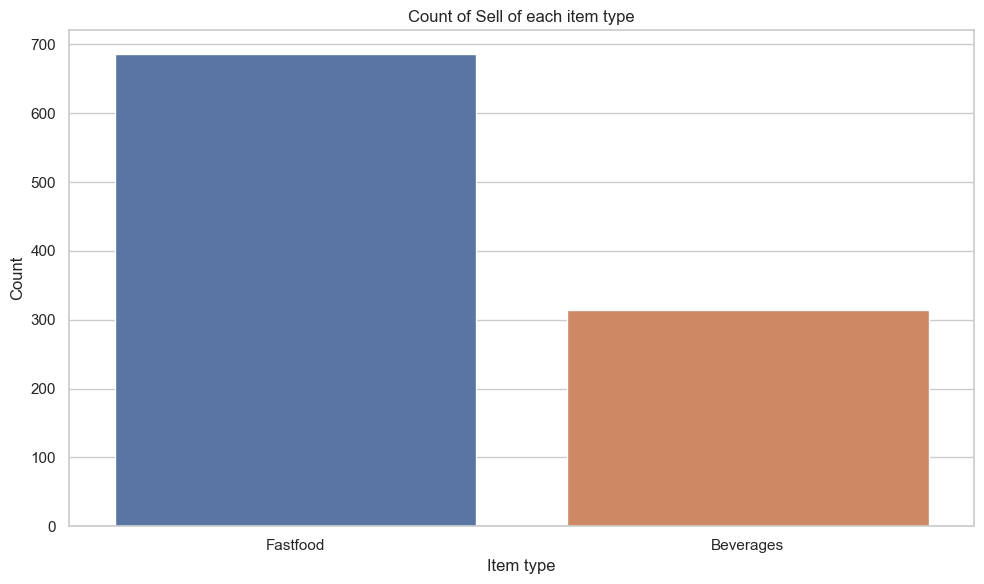

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='item_type')
plt.xlabel("Item type")
plt.ylabel("Count")
plt.title("Count of Sell of each item type")
plt.tight_layout()
plt.show()


#### Query 9: How many orders were received by male and female?

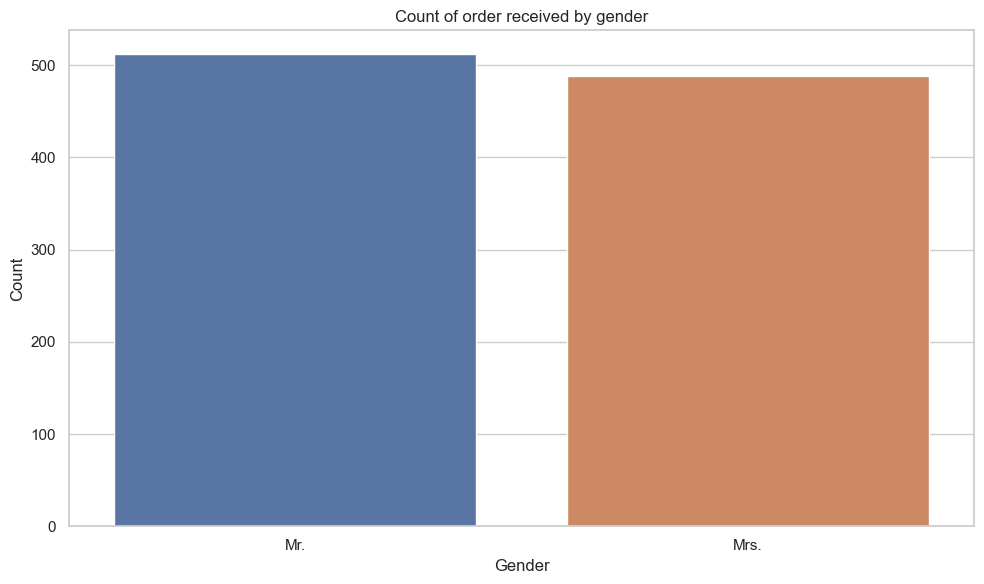

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='received_by')
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Count of order received by gender")
plt.tight_layout()
plt.show()


#### Query 10: What was the most frequently utilized transaction method?

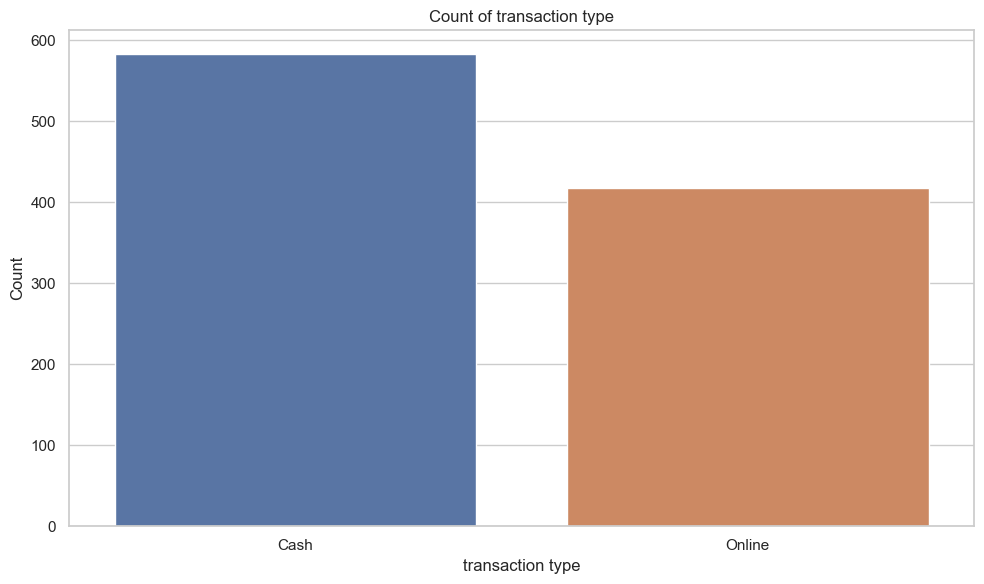

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='transaction_type')
plt.xlabel("transaction type")
plt.ylabel("Count")
plt.title("Count of transaction type")
plt.tight_layout()
plt.show()


#### Query 11: How frequently was each transaction method used at different times?


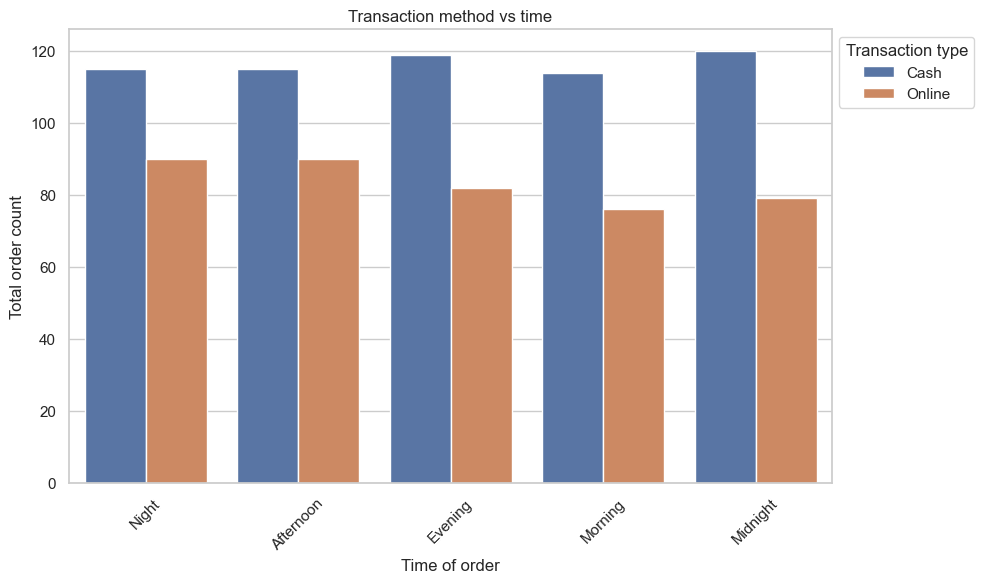

In [35]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='time_of_sale', hue='transaction_type')
plt.xlabel("Time of order")
plt.ylabel("Total order count")
plt.title("Transaction method vs time")
plt.legend(title='Transaction type', bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Query 12: How many transactions were conducted each day for each payment method?

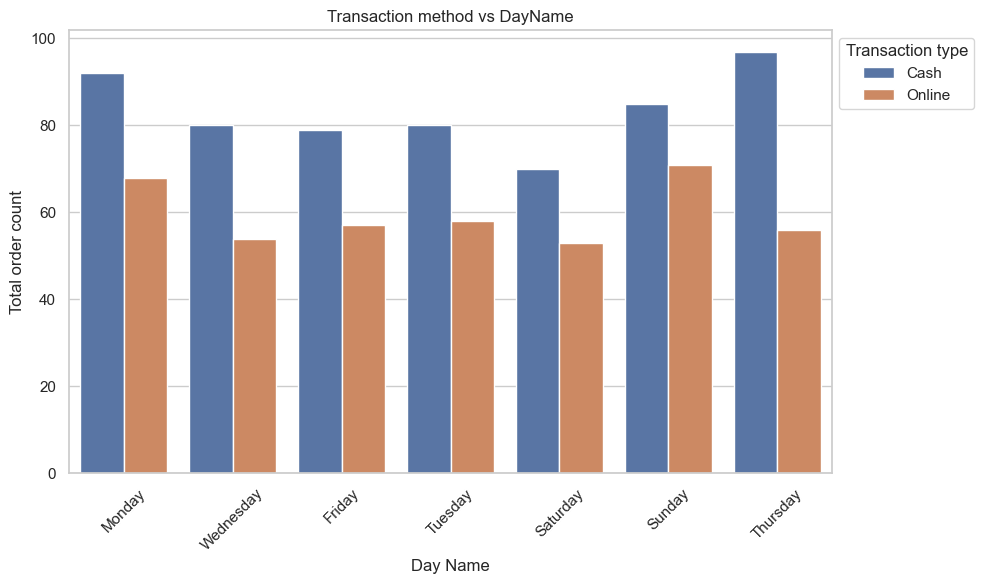

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='DayName', hue='transaction_type')
plt.xlabel("Day Name")
plt.ylabel("Total order count")
plt.title("Transaction method vs DayName")
plt.legend(title='Transaction type', bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Query 13: What is the total sold amount of each month?

In [37]:
total_sales_by_month =df.groupby(['MonthName'])['total_price'].sum().reset_index()
total_sales_by_month

,MonthName,total_price
0,April,17670
1,August,22305
2,December,23460
3,February,25595
4,January,28670
5,July,19490
6,June,17335
7,March,25390
8,May,26570
9,November,22900


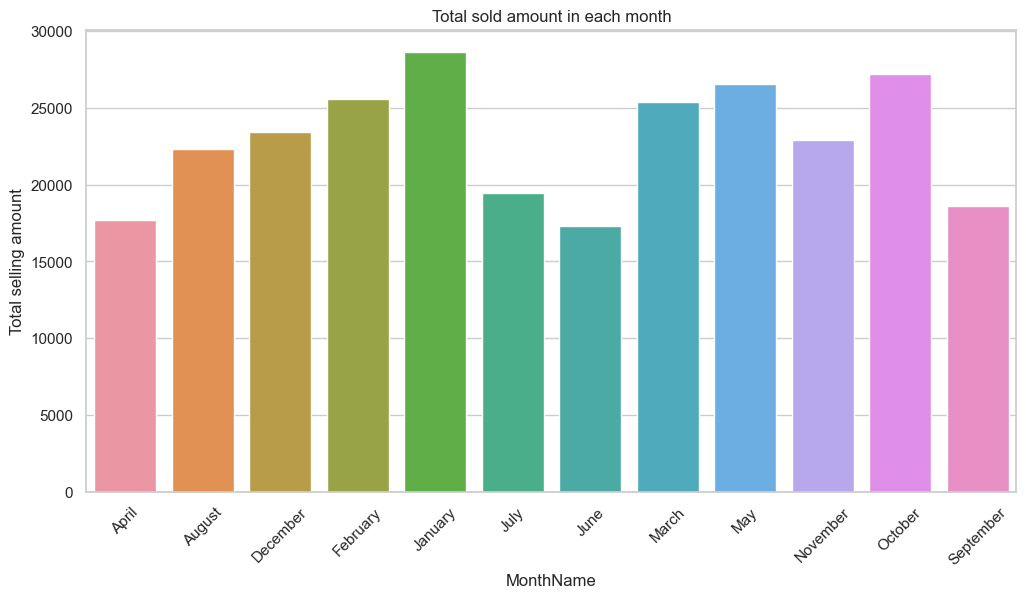

In [38]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(data=total_sales_by_month, x='MonthName', y='total_price')
plt.xticks(rotation=45)  
plt.xlabel("MonthName")
plt.ylabel("Total selling amount")
plt.title("Total sold amount in each month")
plt.show()


#### Query 14: What is the total sold amount of each time period?

In [39]:
total_sales_by_time =df.groupby(['time_of_sale'])['total_price'].sum().reset_index()
total_sales_by_time

,time_of_sale,total_price
0,Afternoon,56345
1,Evening,52355
2,Midnight,50725
3,Morning,53730
4,Night,62075


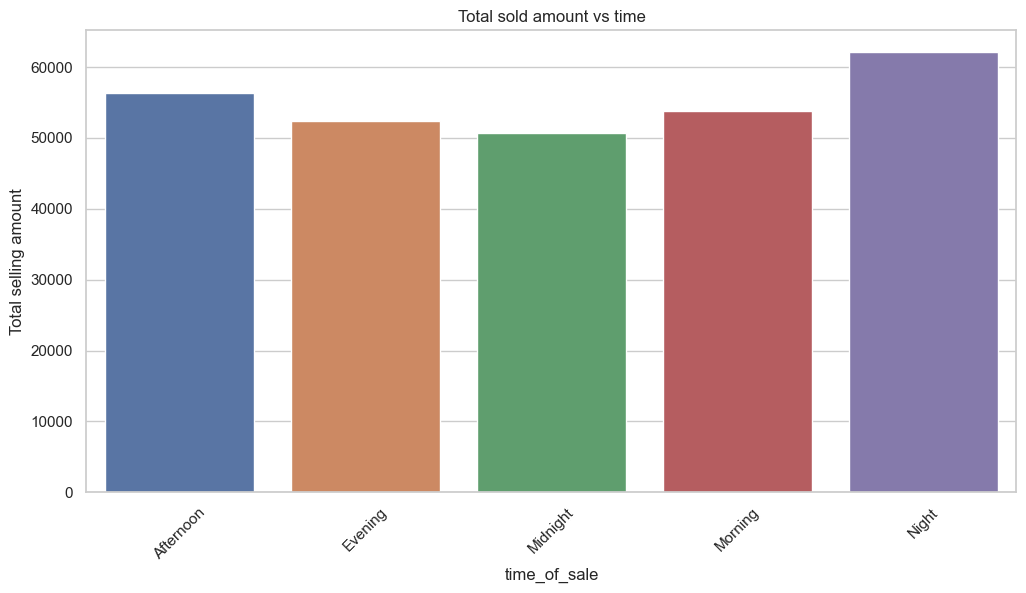

In [40]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(data=total_sales_by_time, x='time_of_sale', y='total_price')
plt.xticks(rotation=45)  
plt.xlabel("time_of_sale")
plt.ylabel("Total selling amount")
plt.title("Total sold amount vs time")
plt.show()


#### Query 15: What is the total sold amount of each item?

In [41]:
total_sales_by_item_nm =df.groupby(['item_name'])['total_price'].sum().reset_index()
total_sales_by_item_nm

,item_name,total_price
0,Aalopuri,20880
1,Cold coffee,54440
2,Frankie,57500
3,Panipuri,24520
4,Sandwich,65820
5,Sugarcane juice,31950
6,Vadapav,20120


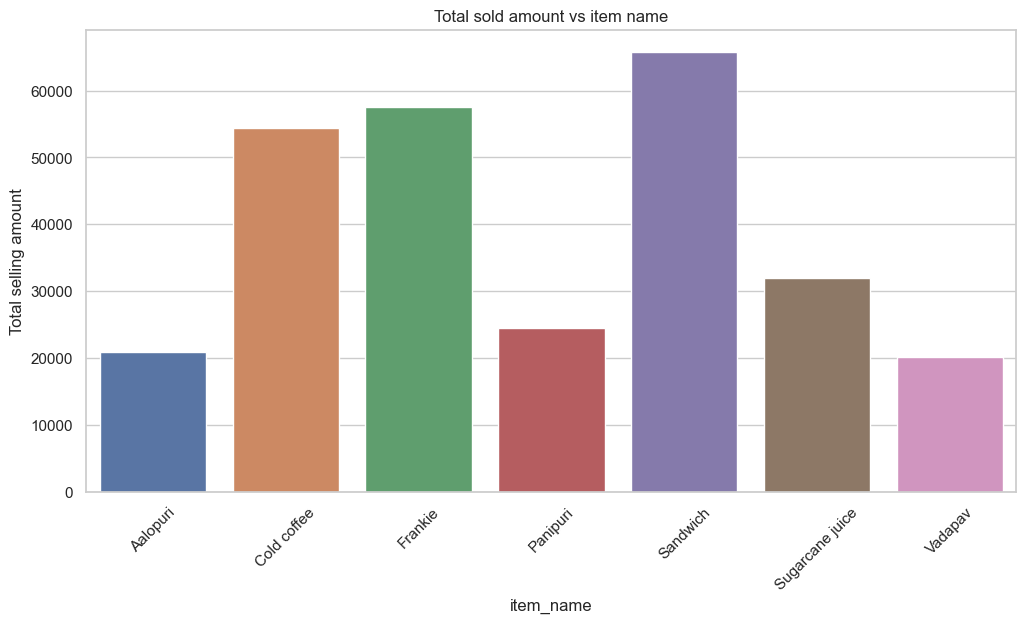

In [42]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(data=total_sales_by_item_nm, x='item_name', y='total_price')
plt.xticks(rotation=45)  
plt.xlabel("item_name")
plt.ylabel("Total selling amount")
plt.title("Total sold amount vs item name")
plt.show()


#### Query 16: What is the total sold amount of each item type?

In [43]:
total_sales_by_item_typ =df.groupby(['item_type'])['total_price'].sum().reset_index()
total_sales_by_item_typ

,item_type,total_price
0,Beverages,86390
1,Fastfood,188840


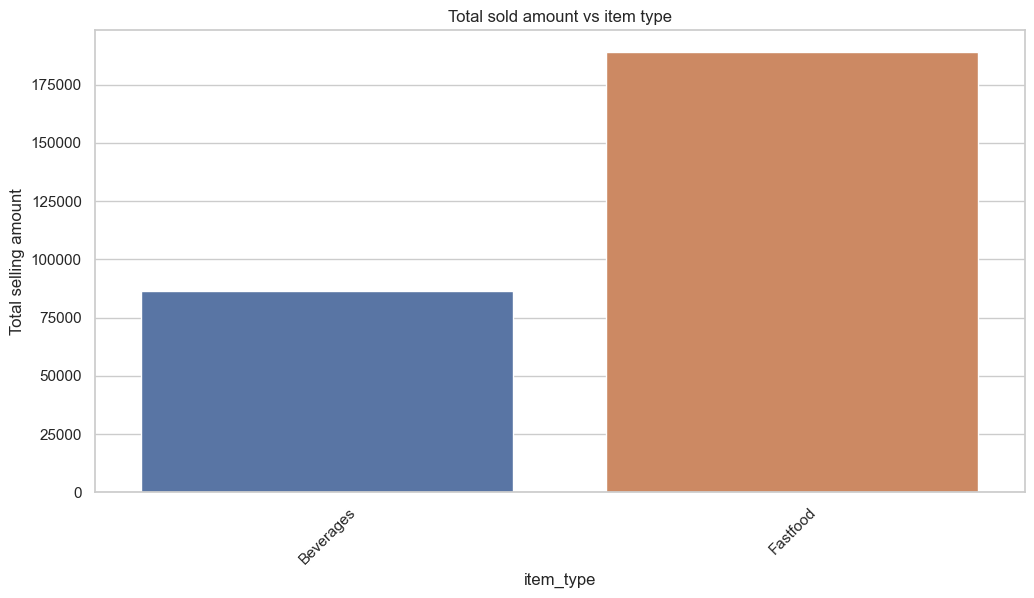

In [44]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(data=total_sales_by_item_typ, x='item_type', y='total_price')
plt.xticks(rotation=45)  
plt.xlabel("item_type")
plt.ylabel("Total selling amount")
plt.title("Total sold amount vs item type")
plt.show()


#### query 17: Create a lineplot and show total sell of each month

In [45]:
total_sales_by_month =df.groupby(['MonthName'])['total_price'].sum().reset_index()
total_sales_by_month

,MonthName,total_price
0,April,17670
1,August,22305
2,December,23460
3,February,25595
4,January,28670
5,July,19490
6,June,17335
7,March,25390
8,May,26570
9,November,22900


In [52]:
#####################################
  ###  Chaning the order of month ##
######################################

month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

total_sales_by_month['MonthName'] = pd.Categorical(total_sales_by_month['MonthName'], categories=month_order, ordered=True)

total_sales_by_month = total_sales_by_month.sort_values('MonthName')
total_sales_by_month


,MonthName,total_price
4,January,28670
3,February,25595
7,March,25390
0,April,17670
8,May,26570
6,June,17335
5,July,19490
1,August,22305
11,September,18640
10,October,27205


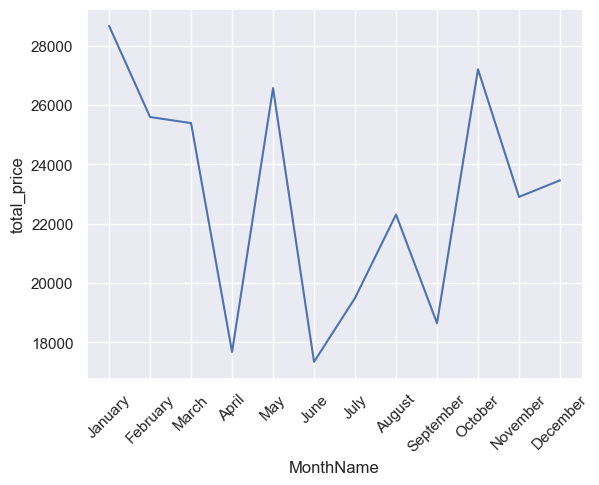

In [53]:
sns.lineplot(x="MonthName",y="total_price",data=total_sales_by_month)
sns.set(style="darkgrid")
plt.xticks(rotation=45) 
plt.show()